<a href="https://colab.research.google.com/github/tom2001cc/MyPythonRepo/blob/main/test_20230805.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
import time
import string
import urllib.parse
import collections
import calendar
from datetime import datetime, date, timedelta
import itertools

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit

%matplotlib inline
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

### Load dataset

In [7]:
# CSVファイルのパスを指定
file_path1 = './CCA1 10.csv'
file_path2 = './CCA2 10.csv'
num = 10

# 読み込み
df_train = pd.read_csv(file_path1, header=None)
df_test = pd.read_csv(file_path2, header=None)

#print(df_train)
a1 = df_train.values
a11 = a1.shape[0]
a2 = a1[a11-1,0]
print(a2)

a13 = a1[:a11,0]

print(a13)


a3 = df_test.values
print(a3)
a4 = np.where(a3[:,0] == a2)[0][0]
print(a4)




FileNotFoundError: ignored

In [ ]:
# カラム名を設定
# df_train.columns = ['date', 'target'] + [f'feature_{i}' for i in range(1, df_train.shape[1]-1)]
# df_test.columns = ['date', 'target'] + [f'feature_{i}' for i in range(1, df_test.shape[1]-1)]

# カラム名を設定 feature_3から設定
df_train.columns = ['date', 'target'] + [f'feature_{i}' for i in range(3, df_train.shape[1]-2+3)]
df_test.columns = ['date', 'target'] + [f'feature_{i}' for i in range(3, df_test.shape[1]-2+3)]

print(df_train.shape[1]-2+3)
print(df_test.shape[1]-2+3)

16
16


In [ ]:
# 日付カラムを日付型に変換
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y%m%d')
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y%m%d')


print(df_train)


          date    target  feature_3  feature_4  feature_5  feature_6  \
0   2020-01-02  0.000000   0.020549  -0.023562   0.062566  -0.009355   
1   2020-01-03 -0.008436   0.021722  -0.003020   0.008117  -0.035840   
2   2020-01-06 -0.014533   0.026839   0.027149  -0.041975  -0.031235   
3   2020-01-07 -0.020011   0.031111   0.033564  -0.083167  -0.014994   
4   2020-01-08 -0.018984   0.024834   0.023746  -0.075982   0.035170   
5   2020-01-09 -0.020670   0.022647   0.028586  -0.048749   0.036499   
6   2020-01-10 -0.011804   0.014670  -0.000163  -0.093307   0.039995   
7   2020-01-13 -0.007883   0.011528   0.003700  -0.083170   0.054315   
8   2020-01-14 -0.003944   0.009601   0.002885  -0.156329   0.049281   
9   2020-01-15  0.001691   0.007748   0.007615  -0.151886   0.054211   
10  2020-01-16  0.003382   0.006445   0.023975  -0.138318   0.039143   
11  2020-01-17  0.011344  -0.001088   0.004468  -0.156686   0.030467   
12  2020-01-20  0.011912  -0.002106   0.004322  -0.124165   0.02

In [ ]:
df_train.head()

,date,target,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,2020-01-02,0.000000,0.020549,-0.023562,0.062566,-0.009355,0.109164,-0.236947,-0.238083,-0.075105,3.169071,0.060340,0.057208,0.022453,0.076340
1,2020-01-03,-0.008436,0.021722,-0.003020,0.008117,-0.035840,0.099483,-0.229663,-0.232179,-0.073529,2.623370,0.058001,0.033400,0.017200,0.057236
2,2020-01-06,-0.014533,0.026839,0.027149,-0.041975,-0.031235,0.095372,-0.222239,-0.226182,-0.071948,2.203991,0.063400,0.070487,0.023411,0.070211
3,2020-01-07,-0.020011,0.031111,0.033564,-0.083167,-0.014994,0.080015,-0.204840,-0.200737,-0.067658,1.871622,0.064101,0.059501,0.028349,0.078900
4,2020-01-08,-0.018984,0.024834,0.023746,-0.075982,0.035170,0.081549,-0.197344,-0.195024,-0.066163,1.601728,0.054000,0.072399,0.025145,0.079300


In [ ]:
df_test.head()

,date,target,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,2022-08-01,0.079245,0.011464,-0.053991,-0.075128,0.089343,-0.175016,0.045347,-0.037643,-0.092904,-0.039750,0.085681,0.035947,-0.011664,0.117704
1,2022-08-02,0.038201,0.026328,-0.027400,-0.046933,0.093073,-0.090261,-0.046413,-0.069748,-0.082585,-0.037759,0.096001,0.032136,0.014558,0.177010
2,2022-08-03,0.017532,0.047979,-0.011844,-0.015520,0.155525,-0.128165,-0.040307,-0.059193,-0.075056,-0.034962,0.113920,0.026796,0.037375,0.214743
3,2022-08-04,0.043040,0.029322,-0.028520,-0.019670,0.152287,-0.120558,-0.039017,-0.054907,-0.070724,-0.032483,0.088970,0.004608,0.014598,0.182641
4,2022-08-05,0.027342,0.037372,-0.018244,-0.036990,0.145025,-0.099429,-0.037722,-0.050581,-0.066352,-0.029992,0.092407,0.003798,0.035304,0.210571


In [ ]:
# 欠損値の確認
print(df_train.isnull().sum())

date          0
target        0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
dtype: int64


In [ ]:
# 欠損値の確認
print(df_test.isnull().sum())

date           0
target        10
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
dtype: int64


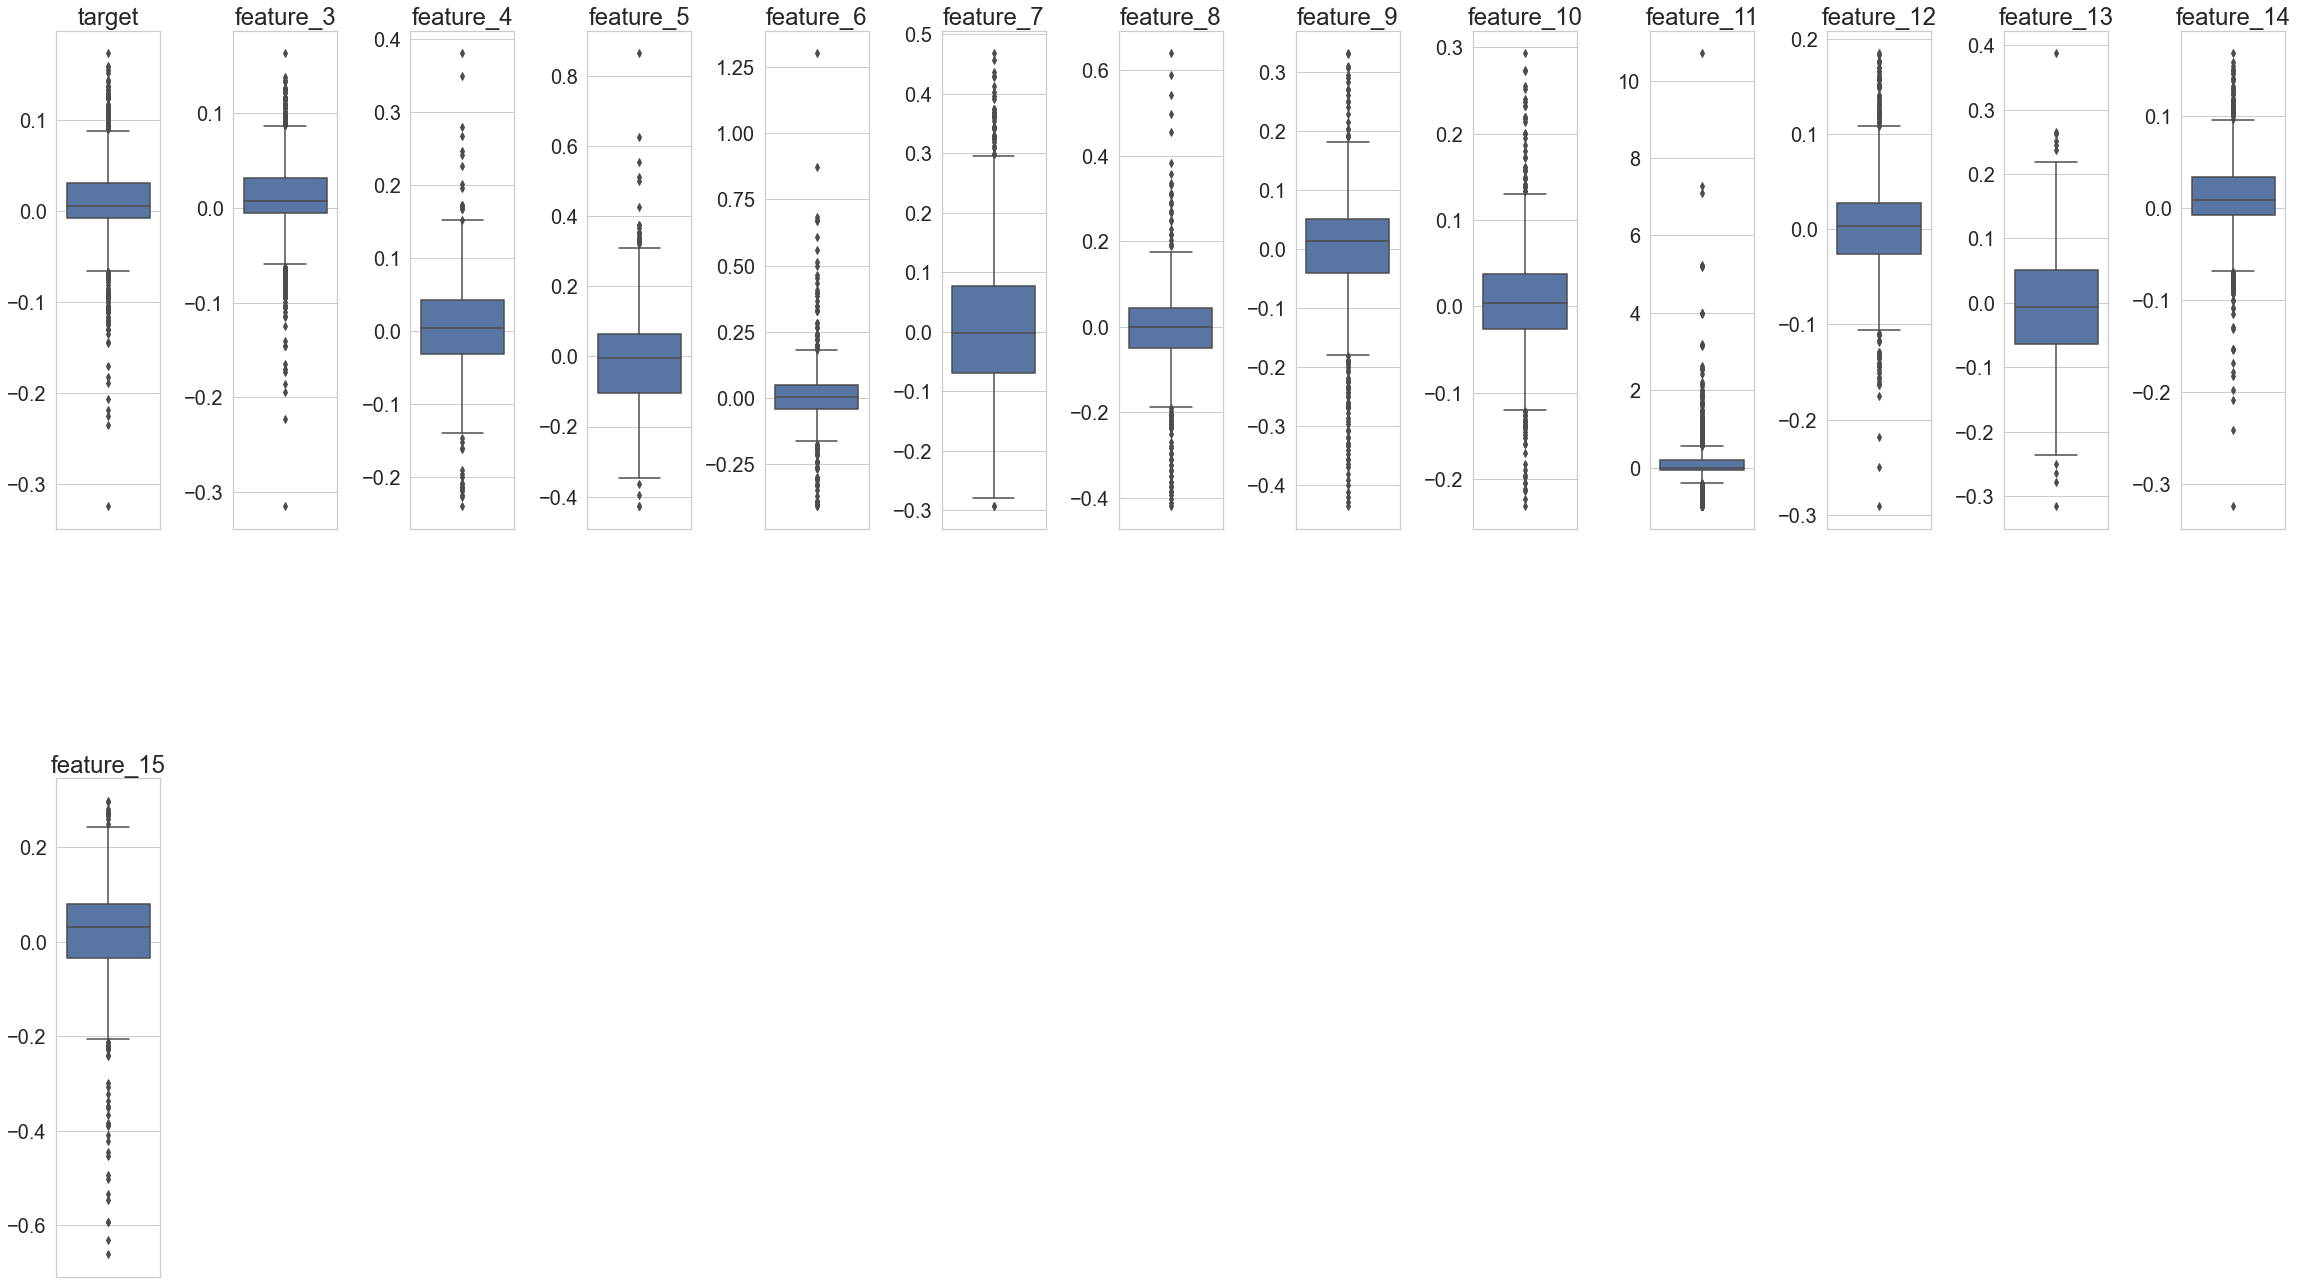

In [ ]:
# seabornのスタイルとカラーパレットを設定
sns.set_theme(style="whitegrid")
boxplot_color = sns.color_palette('deep')[0]

# 数値型のカラムのみを選択
num_cols = df_train.select_dtypes(include=[np.number]).columns

# 箱ひげ図をプロット
n = len(num_cols)
n_cols = 13
n_rows = n // n_cols if n % n_cols == 0 else n // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(32, 18))

for idx, col in enumerate(num_cols):
    row_idx, col_idx = divmod(idx, n_cols)
    sns.boxplot(y=df_train[col], ax=axes[row_idx, col_idx], color=boxplot_color)
    axes[row_idx, col_idx].set_title(col, fontsize=24)
    axes[row_idx, col_idx].set_xlabel('')
    axes[row_idx, col_idx].set_ylabel('')
    axes[row_idx, col_idx].tick_params(axis='y', labelsize=20)

# 余分なサブプロットを削除
for idx in range(n, n_rows*n_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
# 特徴量とターゲットを分割
X_train = df_train.drop(['date','target'], axis=1)
y_train = df_train.set_index('date')['target']
X_test = df_test.drop(['date', 'target'], axis=1)
y_test_known = df_test[df_test['target'].notna()]['target']

In [ ]:
# モデルの訓練
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# モデルを適用
test_pred = model.predict(X_test)

In [ ]:
# 予測結果を追加
df_test['prediction'] = test_pred

In [ ]:
# 評価関数
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'Mean Absolute Error (MAE)': mae,
        'Mean Squared Error (MSE)': mse,
        'R^2 Score': r2,
        'Mean Absolute Percentage Error (MAPE)': mape,
    }

In [ ]:
# モデルの評価
metrics = calculate_metrics(y_test_known, test_pred[:len(y_test_known)])

for metric, value in metrics.items():
    print(f'{metric}: {value}')

Mean Absolute Error (MAE): 0.006359092708669526
Mean Squared Error (MSE): 8.348349389768992e-05
R^2 Score: 0.9468887017519317
Mean Absolute Percentage Error (MAPE): inf


243
233    0.019093
234    0.023077
235    0.018084
236    0.022073
237    0.019143
238    0.015001
239    0.003543
240    0.006369
241    0.009275
242    0.015321
Name: prediction, dtype: float64


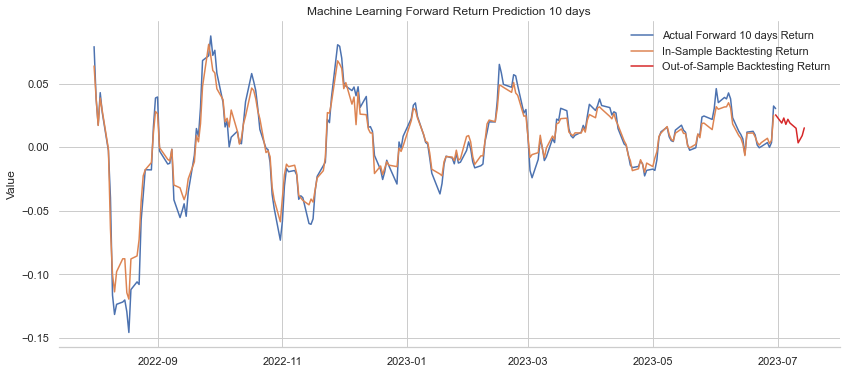

In [ ]:
# 結果をプロット
sns.set_theme(style="whitegrid")
boxplot_color = sns.color_palette('deep')[0]
plt.figure(figsize=(14, 6))

sns.lineplot(data=df_test.iloc[:len(y_test_known)], x='date', y='target', label='Actual Forward ' + str(num) + ' days Return')
#sns.lineplot(data=df_test.iloc[:len(y_test_known)], x='date', y='prediction', label='In Sample Return')
sns.lineplot(data=df_test.iloc[:a4], x='date', y='prediction', label='In-Sample Backtesting Return')

# 予測部分をプロット（未知の部分の色を変更）
#ns.lineplot(data=df_test.iloc[len(y_test_known):], x='date', y='prediction', color='tab:red', label='Out of Sample Return')
sns.lineplot(data=df_test.iloc[a4:], x='date', y='prediction', color='tab:red', label='Out-of-Sample Backtesting Return')

print(df_test.shape[0])
#print(df_test.iloc[len(y_test_known):])
print(df_test.iloc[df_test.shape[0]-10:,df_test.shape[1]-1])

plt.title('Machine Learning Forward Return Prediction '+ str(num) + ' days')
plt.xlabel('')
plt.ylabel('Value')
sns.despine(left=True)
plt.legend(frameon=False)
plt.show()